# 19 Jan - GloVe

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### 1. Loading Data

In [2]:
#define the training corpus
#I use the Inaugural Address Corpus from NLTK
import nltk
from nltk.corpus import inaugural
corpus = nltk.corpus.inaugural.sents()

In [3]:
#the corpus is already tokenized
corpus

[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'], ['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ...]

In [4]:
#convert the words in the corpus into lower case
corpus_tokenized = [[]] * len(corpus)
for i in range(len(corpus)):
    corpus_tokenized[i] = [word.lower() for word in corpus[i]]

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of', 'representatives', ':'], ['among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ['on', 'the', 'one', 'hand', ',', 'i', 'was', 'summoned', 'by', 'my', 'country', ',', 'whose', 'voice', 'i', 'can', 'never', 'hear', 'but', 'with', 'veneration', 'and', 'love', ',', 'from', 'a', 'retreat', 'which', 'i', 'had', 'chosen', 'with', 'the', 'fondest', 'predilection', ',', 'and', ',', 'in', 'my', 'flattering', 'hopes', ',', 'with', 'an', 'immutable', 'decision', ',', 'as', 'the', 'asylum', 'of', 'my', 'declining', 'years', '--', 'a', 'retreat', 'which', 'was', 'rendered', 'every', 'day', 'more', 'necessary', 'as', 'well', 'as', 'more', 'dear',

In [5]:
#remove stop words with SpaCy
import spacy
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in stopwords:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'senate', 'house', 'representatives', ':'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', ',', 'received', '14th', 'day', 'present', 'month', '.'], ['hand', ',', 'summoned', 'country', ',', 'voice', 'hear', 'veneration', 'love', ',', 'retreat', 'chosen', 'fondest', 'predilection', ',', ',', 'flattering', 'hopes', ',', 'immutable', 'decision', ',', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', ',', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time', '.'], ['hand', ',', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', ',', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', ',', 'overwhelm', 'despondence', '(', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 

In [6]:
#remove punctutations with String
import string
punctutations = string.punctuation

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in punctutations:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare',

In [7]:
#remove '--'
for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word == '--':
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare', 'aver

In [8]:
#get unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs = list(set(flatten(corpus_tokenized)))

print(len(vocabs))

9019


In [9]:
#numericalize the words
word2index = {w: i for i, w in enumerate(vocabs)}

word2index

{'fairer': 0,
 'course': 1,
 'disposing': 2,
 'befit': 3,
 'prideful': 4,
 'reservoir': 5,
 'total': 6,
 'debts': 7,
 'revived': 8,
 'industrialism': 9,
 'janeiro': 10,
 'prized': 11,
 'pause': 12,
 'tend': 13,
 'inquiry': 14,
 'useful': 15,
 'reduction': 16,
 'terminate': 17,
 'aggression': 18,
 'shatter': 19,
 'lately': 20,
 'sick': 21,
 'forums': 22,
 'lie': 23,
 'spare': 24,
 'fleet': 25,
 'fit': 26,
 'exist': 27,
 'strove': 28,
 'virtually': 29,
 'severed': 30,
 'chosen': 31,
 'unexplained': 32,
 'approximated': 33,
 'durability': 34,
 'protest': 35,
 'farmers': 36,
 'till': 37,
 'unused': 38,
 'goingness': 39,
 'cherished': 40,
 'audacity': 41,
 'thinking': 42,
 'anxiously': 43,
 'debt': 44,
 'generations': 45,
 'violated': 46,
 'vigorously': 47,
 'wealthy': 48,
 'assail': 49,
 'unsolicited': 50,
 'dedicate': 51,
 'exampleâ': 52,
 'directions': 53,
 '400': 54,
 'anarchy': 55,
 'loveliness': 56,
 'shade': 57,
 'subjected': 58,
 'settlements': 59,
 'inculcating': 60,
 'check': 61,


In [10]:
#append <UNK>
vocabs.append('<UNK>')
word2index['<UNK>'] = 9019

len(word2index)

9020

In [11]:
#create index2word dictionary  
index2word = {v:k for k, v in word2index.items()}

index2word

{0: 'fairer',
 1: 'course',
 2: 'disposing',
 3: 'befit',
 4: 'prideful',
 5: 'reservoir',
 6: 'total',
 7: 'debts',
 8: 'revived',
 9: 'industrialism',
 10: 'janeiro',
 11: 'prized',
 12: 'pause',
 13: 'tend',
 14: 'inquiry',
 15: 'useful',
 16: 'reduction',
 17: 'terminate',
 18: 'aggression',
 19: 'shatter',
 20: 'lately',
 21: 'sick',
 22: 'forums',
 23: 'lie',
 24: 'spare',
 25: 'fleet',
 26: 'fit',
 27: 'exist',
 28: 'strove',
 29: 'virtually',
 30: 'severed',
 31: 'chosen',
 32: 'unexplained',
 33: 'approximated',
 34: 'durability',
 35: 'protest',
 36: 'farmers',
 37: 'till',
 38: 'unused',
 39: 'goingness',
 40: 'cherished',
 41: 'audacity',
 42: 'thinking',
 43: 'anxiously',
 44: 'debt',
 45: 'generations',
 46: 'violated',
 47: 'vigorously',
 48: 'wealthy',
 49: 'assail',
 50: 'unsolicited',
 51: 'dedicate',
 52: 'exampleâ',
 53: 'directions',
 54: '400',
 55: 'anarchy',
 56: 'loveliness',
 57: 'shade',
 58: 'subjected',
 59: 'settlements',
 60: 'inculcating',
 61: 'check',


### 2. Co-occurrence matrix

In [12]:
#count the frequency of each word
from collections import Counter

X_i = Counter(flatten(corpus_tokenized))

X_i

Counter({'fellow': 158,
         'citizens': 248,
         'senate': 16,
         'house': 12,
         'representatives': 19,
         'vicissitudes': 5,
         'incident': 8,
         'life': 140,
         'event': 16,
         'filled': 6,
         'greater': 54,
         'anxieties': 3,
         'notification': 1,
         'transmitted': 3,
         'order': 66,
         'received': 12,
         '14th': 1,
         'day': 98,
         'present': 86,
         'month': 2,
         'hand': 51,
         'summoned': 6,
         'country': 322,
         'voice': 24,
         'hear': 12,
         'veneration': 5,
         'love': 56,
         'retreat': 9,
         'chosen': 23,
         'fondest': 1,
         'predilection': 1,
         'flattering': 1,
         'hopes': 38,
         'immutable': 3,
         'decision': 14,
         'asylum': 1,
         'declining': 3,
         'years': 143,
         'rendered': 7,
         'necessary': 82,
         'dear': 8,
         'addition': 6,


In [13]:
#define a skipgram of window size 1
skip_grams = []

for sent in corpus_tokenized:
    for i in range(1, len(sent)-1):
        target  = sent[i]
        context = [sent[i+1], sent[i-1]]
        for c in context:
            skip_grams.append((target, c))

In [14]:
skip_grams

[('citizens', 'senate'),
 ('citizens', 'fellow'),
 ('senate', 'house'),
 ('senate', 'citizens'),
 ('house', 'representatives'),
 ('house', 'senate'),
 ('incident', 'life'),
 ('incident', 'vicissitudes'),
 ('life', 'event'),
 ('life', 'incident'),
 ('event', 'filled'),
 ('event', 'life'),
 ('filled', 'greater'),
 ('filled', 'event'),
 ('greater', 'anxieties'),
 ('greater', 'filled'),
 ('anxieties', 'notification'),
 ('anxieties', 'greater'),
 ('notification', 'transmitted'),
 ('notification', 'anxieties'),
 ('transmitted', 'order'),
 ('transmitted', 'notification'),
 ('order', 'received'),
 ('order', 'transmitted'),
 ('received', '14th'),
 ('received', 'order'),
 ('14th', 'day'),
 ('14th', 'received'),
 ('day', 'present'),
 ('day', '14th'),
 ('present', 'month'),
 ('present', 'day'),
 ('summoned', 'country'),
 ('summoned', 'hand'),
 ('country', 'voice'),
 ('country', 'summoned'),
 ('voice', 'hear'),
 ('voice', 'country'),
 ('hear', 'veneration'),
 ('hear', 'voice'),
 ('veneration', 'lov

In [15]:
#make the co-occurrence matrix
X_ik_skipgram = Counter(skip_grams)
X_ik_skipgram

Counter({('citizens', 'senate'): 1,
         ('citizens', 'fellow'): 107,
         ('senate', 'house'): 2,
         ('senate', 'citizens'): 1,
         ('house', 'representatives'): 4,
         ('house', 'senate'): 4,
         ('incident', 'life'): 1,
         ('incident', 'vicissitudes'): 1,
         ('life', 'event'): 1,
         ('life', 'incident'): 1,
         ('event', 'filled'): 1,
         ('event', 'life'): 1,
         ('filled', 'greater'): 1,
         ('filled', 'event'): 1,
         ('greater', 'anxieties'): 1,
         ('greater', 'filled'): 1,
         ('anxieties', 'notification'): 1,
         ('anxieties', 'greater'): 1,
         ('notification', 'transmitted'): 1,
         ('notification', 'anxieties'): 1,
         ('transmitted', 'order'): 1,
         ('transmitted', 'notification'): 1,
         ('order', 'received'): 1,
         ('order', 'transmitted'): 1,
         ('received', '14th'): 1,
         ('received', 'order'): 1,
         ('14th', 'day'): 1,
         ('14

### 3. Weighting function f

In [16]:
def weighting(w_i, w_j, X_ik):
    
    #check whether the co-occurrences between these two word exists???
    try:
        x_ij = X_ik[(w_i, w_j)]
    except:
        x_ij = 1  #why one, so that the probability thingy won't break...(label smoothing)
        
    #maximum co-occurrences; we follow the paper
    x_max = 100
    alpha = 0.75
    
    #if the co-occurrences does not exceed x_max, scale it down based on some alpha
    if x_ij < x_max:
        result = (x_ij/x_max) ** alpha
    else:
        result = 1 #this is the maximum probability you can have
        
    return result

In [18]:
w_i  = 'democracy'
w_j  = 'freedom'

print(weighting(w_i, w_j, X_ik_skipgram))


0.07208434242404263


In [23]:
#now apply this weighting to all possible pairs
from itertools import combinations_with_replacement

X_ik = {} #for keeping the co-occurrences
weighting_dic = {} #for keeping all the probability after passing through the weighting function

for bigram in combinations_with_replacement(vocabs, 2):  #we need to also think its reverse
    #if this bigram exists in X_ik_skipgrams
    #we gonna add this to our co-occurence matrix
    if X_ik_skipgram.get(bigram) is not None:
        cooc = X_ik_skipgram[bigram]  #get the co-occurrence
        X_ik[bigram] = cooc + 1 #this is again basically label smoothing....(stability issues (especially when divide something))
        X_ik[(bigram[1], bigram[0])] = cooc + 1  #trick to get all pairs
    else: #otherwise, do nothing
        pass
    
    #apply the weighting function using this co-occurrence matrix thingy    
    weighting_dic[bigram] = weighting(bigram[0], bigram[1], X_ik)
    weighting_dic[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], X_ik)
    

In [24]:
len(X_ik_skipgram)

12

In [25]:
X_ik

{('apple', 'fruit'): 2,
 ('fruit', 'apple'): 2,
 ('apple', 'banana'): 2,
 ('banana', 'apple'): 2,
 ('fruit', 'banana'): 2,
 ('banana', 'fruit'): 2,
 ('dog', 'cat'): 2,
 ('cat', 'dog'): 2,
 ('dog', 'animal'): 2,
 ('animal', 'dog'): 2,
 ('cat', 'animal'): 2,
 ('animal', 'cat'): 2}

In [26]:
# weighting_dic  #give small probability to never-occurred is called "label smoothing"

## 4. Prepare train data
You move the window along, and create those tuples as we said in class

In [27]:
for c in corpus_tokenized:
    print(c)

['apple', 'banana', 'fruit']
['banana', 'apple', 'fruit']
['banana', 'fruit', 'apple']
['dog', 'cat', 'animal']
['cat', 'dog', 'animal']
['cat', 'animal', 'dog']


In [28]:
skip_grams

[('banana', 'fruit'),
 ('banana', 'apple'),
 ('apple', 'fruit'),
 ('apple', 'banana'),
 ('fruit', 'apple'),
 ('fruit', 'banana'),
 ('cat', 'animal'),
 ('cat', 'dog'),
 ('dog', 'animal'),
 ('dog', 'cat'),
 ('animal', 'dog'),
 ('animal', 'cat')]

In [29]:
import math

def random_batch(batch_size, word_sequence, skip_grams, X_ik, weighting_dic):
    
    #loop through this skipgram, and change it id  because when sending model, it must number
    skip_grams_id = [(word2index[skip_gram[0]], word2index[skip_gram[1]]) for skip_gram in skip_grams]
    
    #randomly pick "batch_size" indexes
    number_of_choices = len(skip_grams_id)
    random_index = np.random.choice(number_of_choices, batch_size, replace=False) #no repeating indexes among these random indexes
    
    random_inputs = [] #xi, wi (in batches)
    random_labels = [] #xj, wj (in batches)
    random_coocs  = [] #Xij (in batches)
    random_weighting = [] #f(Xij) (in batches)
    #for each of the sample in these indexes
    for i in random_index:
        random_inputs.append([skip_grams_id[i][0]]) #same reason why i put bracket here....
        random_labels.append([skip_grams_id[i][1]])
        
        #get cooc
        #first check whether it exists...
        pair = skip_grams[i]  #e.g., ('banana', 'fruit)
        try:
            cooc = X_ik[pair]
        except:
            cooc = 1 #label smoothing
            
        random_coocs.append([math.log(cooc)])  #1. why log, #2, why bracket -> size ==> (, 1)  #my neural network expects (, 1)
        
        #get weighting
        weighting = weighting_dic[pair]  #why not use try....maybe it does not exist....
        random_weighting.append(weighting)

        
    return np.array(random_inputs), np.array(random_labels), np.array(random_coocs), np.array(random_weighting)
    

In [30]:
batch_size = 2
input, target, cooc, weightin = random_batch(batch_size, corpus_tokenized, skip_grams, X_ik, weighting_dic)

In [31]:
input, target, cooc, weightin

(array([[2],
        [4]]),
 array([[4],
        [5]]),
 array([[0.69314718],
        [0.69314718]]),
 array([0.05318296, 0.05318296]))

## 4. Model

<img src ="../figures/glove.png">

In [32]:
class GloVe(nn.Module):
    
    def __init__(self, vocab_size,embed_size):
        super(GloVe,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, embed_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, embed_size) # out embedding
        
        self.v_bias = nn.Embedding(vocab_size, 1)
        self.u_bias = nn.Embedding(vocab_size, 1)
        
    def forward(self, center_words, target_words, coocs, weighting):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        
        center_bias = self.v_bias(center_words).squeeze(1)
        target_bias = self.u_bias(target_words).squeeze(1)
        
        inner_product = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        #note that coocs already got log
        loss = weighting*torch.pow(inner_product +center_bias + target_bias - coocs, 2)
        
        return torch.sum(loss)

## 4. Training

In [33]:
voc_size   = len(vocabs)
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = GloVe(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [34]:
num_epochs = 5000
#for epoch
for epoch in range(num_epochs):

    #get random batch
    input, target, cooc, weightin = random_batch(batch_size, corpus_tokenized, skip_grams, X_ik, weighting_dic)
    input_batch    = torch.LongTensor(input)
    target_batch   = torch.LongTensor(target)
    cooc_batch     = torch.FloatTensor(cooc)
    weightin_batch = torch.FloatTensor(weightin)
    
    
    # print(input_batch.shape, label_batch.shape, cooc_batch.shape, weightin_batch)
    
    #loss = model
    loss = model(input_batch, target_batch, cooc_batch, weightin_batch)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 1000 | Loss: 0.482567 | Time: ??
Epoch 2000 | Loss: 0.034147 | Time: ??
Epoch 3000 | Loss: 0.304133 | Time: ??
Epoch 4000 | Loss: 0.127104 | Time: ??
Epoch 5000 | Loss: 0.000083 | Time: ??


## 5. Plot the embeddings

Is really the related stuff are close to each other, and vice versa?

The most fun part:  Will "banana" closer to "fruit" than "cat"?

In [35]:
vocabs

['apple', 'fruit', 'dog', 'banana', 'cat', 'animal', '<UNK>']

In [36]:
banana = torch.LongTensor([word2index['banana']])
banana

tensor([3])

In [37]:
banana_center_embed = model.embedding_v(banana)
banana_outisde_embed = model.embedding_u(banana)

banana_embed = (banana_center_embed + banana_outisde_embed) / 2
banana_embed

tensor([[ 2.8474, -0.1418]], grad_fn=<DivBackward0>)

In [38]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_v(word)
    outside_embed = model.embedding_u(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()


In [39]:
#find embedding of fruit, cat
print(get_embed('fruit'))
print(get_embed('cat'))
print(get_embed('chaky'))

(-1.359787106513977, 0.4226120114326477)
(-1.9744410514831543, -0.8894343376159668)
(0.30555641651153564, -0.6208063960075378)


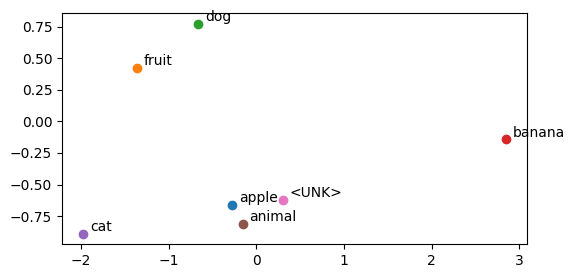

In [40]:
#help me plot fruit cat banana on matplotlib
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## 6. Cosine similarity

How do (from scratch) calculate cosine similarity?